In [24]:
import osmnx as ox
import random
import lib
import numpy as np
from clustering import *

In [25]:
G = lib.load()
allHouses, allInfra = lib.getTaggedNodes(G)

In [26]:
# params
speed = 40 # km/h
maxTime = 20
maxDistance = 2000

houses = random.sample(allHouses, 100)
infra = random.choice(allInfra)

In [27]:
houses_coords = np.array([(G.nodes[h]['y'], G.nodes[h]['x']) for h in houses])
dist_matrix = np.array([[get_distance(p[0], p[1], pp[0], pp[1]) for pp in houses_coords] for p in houses_coords])

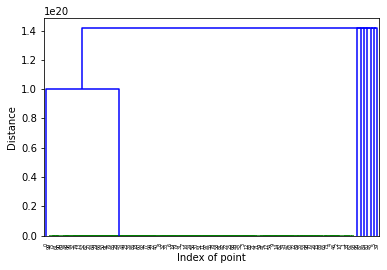

In [28]:
# 2.2)
plot_dendrogram(dist_matrix, truncate_mode='level')

k= 2!!!
[1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 0 1 1 1 0 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1]
2.3 a)
2.3 c, d)
centroid: 295956710, paths len= 56497.648, tree weight= 45582.35199999999
2.3 a)
2.3 c, d)
centroid: 35474858, paths len= 914889.7539999997, tree weight= 193080.46899999987
2.3 b)
infra : 238524485, paths len= 31530.957, tree weight= 21360.638



k= 3!!!
[1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 0 1 1 1 0 1 1 0 1 1 1 1 1 1 1 2 1 1 1 1]
2.3 a)
2.3 c, d)
centroid: 295956710, paths len= 41492.305, tree weight= 30741.744999999995
2.3 a)
2.3 c, d)
centroid: 35474858, paths len= 914889.7539999997, tree weight= 193080.46899999987
2.3 a)
2.3 c, d)
centroid: 6155996, paths len= 0, tree weight= 0
2.3 b)
infra : 238524485, paths len= 57838.809, tree wei

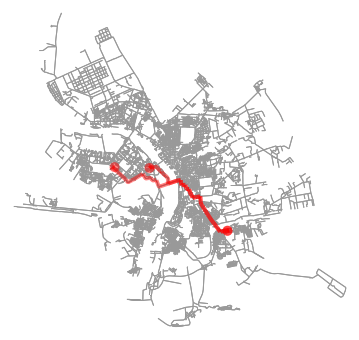

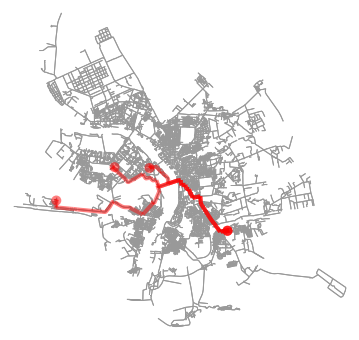

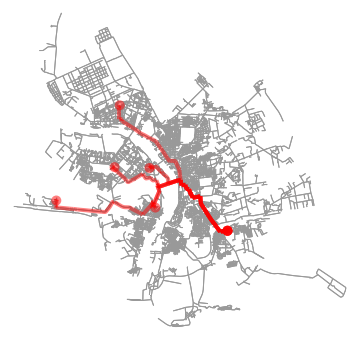

In [29]:
for k in [2, 3, 5]:
    print(f"k= {k}!!!")
    model = get_clusters(dist_matrix, k=k)
    print(model.labels_)
    centroids = []
    for c in range(k):
        # 2.3 a)
        print(f"2.3 a)")
        cluster_coords = houses_coords[model.labels_ == c]
        cluster = np.array(houses)[model.labels_ == c]
        centroids.append(cluster[get_centroid(cluster_coords)])
        # 2.3 c,d)
        print(f"2.3 c, d)")
        routes = lib.getFormSingleToManyPaths(G, centroids[-1], cluster, speed)
        paths_length = sum(route['length'] for route in routes.values())
        routes = [route['route'] for route in routes.values()]
        tree = lib.routes_to_tree(G, routes)
        print(f"centroid: {centroids[-1]}, paths len= {paths_length}, tree weight= {tree['weight']}")
    # 2.3 b)
    print(f"2.3 b)")
    routes = lib.getFormSingleToManyPaths(G, infra, centroids, speed)
    paths_length = sum(route['length'] for route in routes.values())
    routes = [route['route'] for route in routes.values()]
    tree = lib.routes_to_tree(G, routes)
    print(f"infra : {infra}, paths len= {paths_length}, tree weight= {tree['weight']}")

    ox.plot_graph_routes(G, routes, node_size=0)
    print(f"\n\n")